In [1]:
# import libraries

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO
import requests

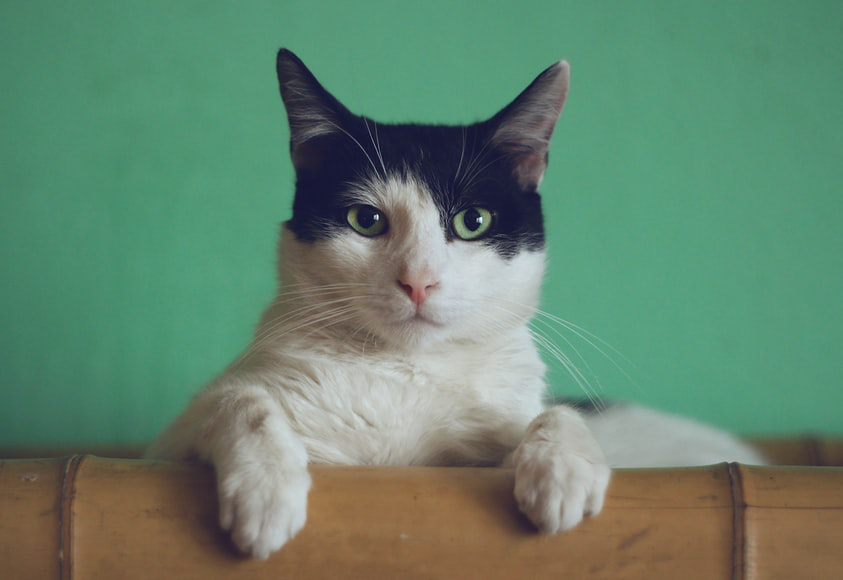

In [2]:
image_url = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=843&q=80'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert()
image


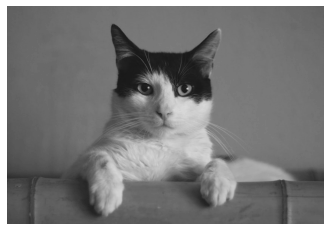

In [4]:
img_arr = np.copy(image)
img_gray_average = np.mean(img_arr, axis=2)

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

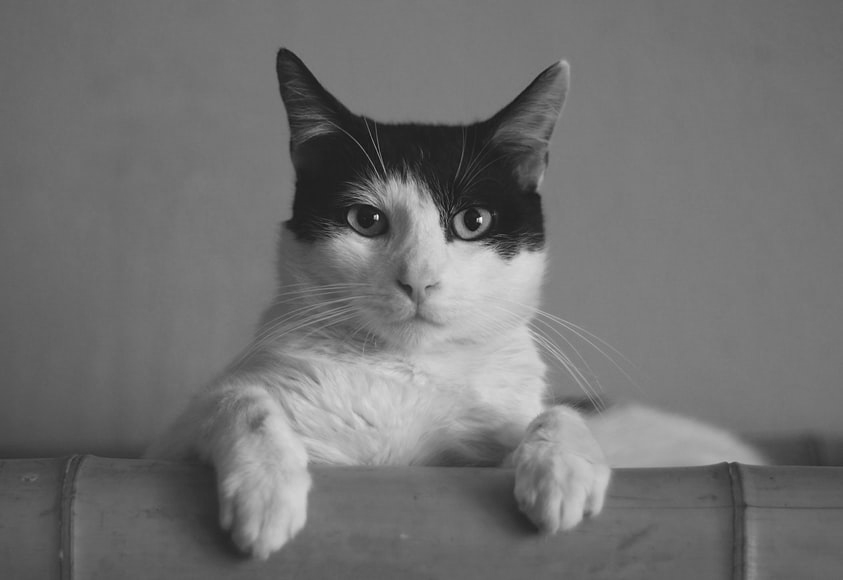

In [7]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)

new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

In [8]:
img_gray_average.shape

(580, 843)

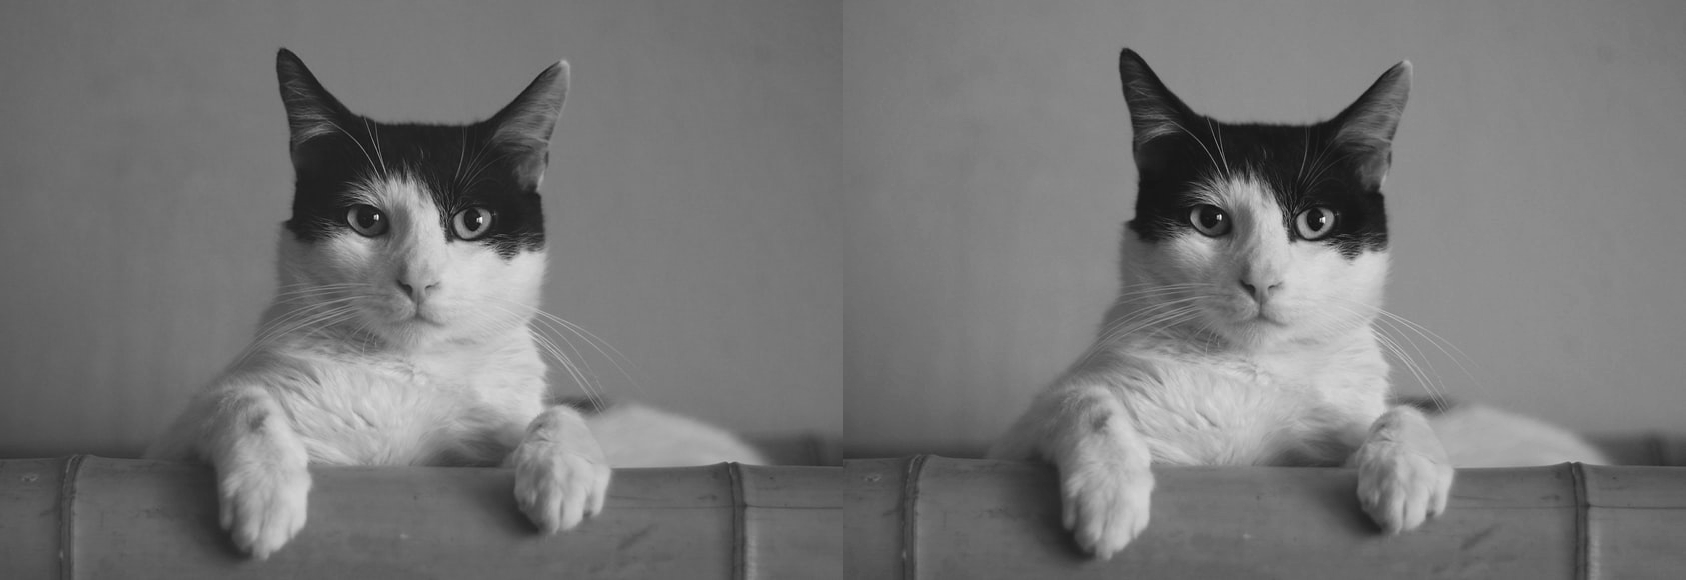

In [12]:
# luminance perception
img_weights = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * img_weights, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones =  Image.fromarray(concat)
img_ones


In [13]:
print(res[0,0,:])
print(img_arr[0,0,:])

[15 87  7]
[ 73 122 100]


In [14]:
res.shape

(580, 843, 3)

In [15]:
np.sum(res, axis=2).shape

(580, 843)

In [16]:
full = 1408 * 2400 * 3
original = 2750 *  4687 * 3

print(f"full: {full}, original: {original} {original/full}")

full: 10137600, original: 38667750 3.8142903645833335


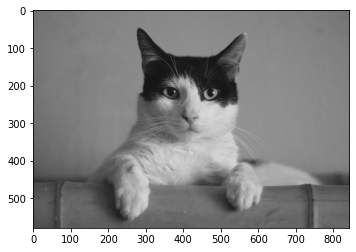

In [17]:
new_array_test = np.sum(res, axis=2)
type(new_array_test)

plt.imshow(new_array_test, cmap='gray')
plt.show()

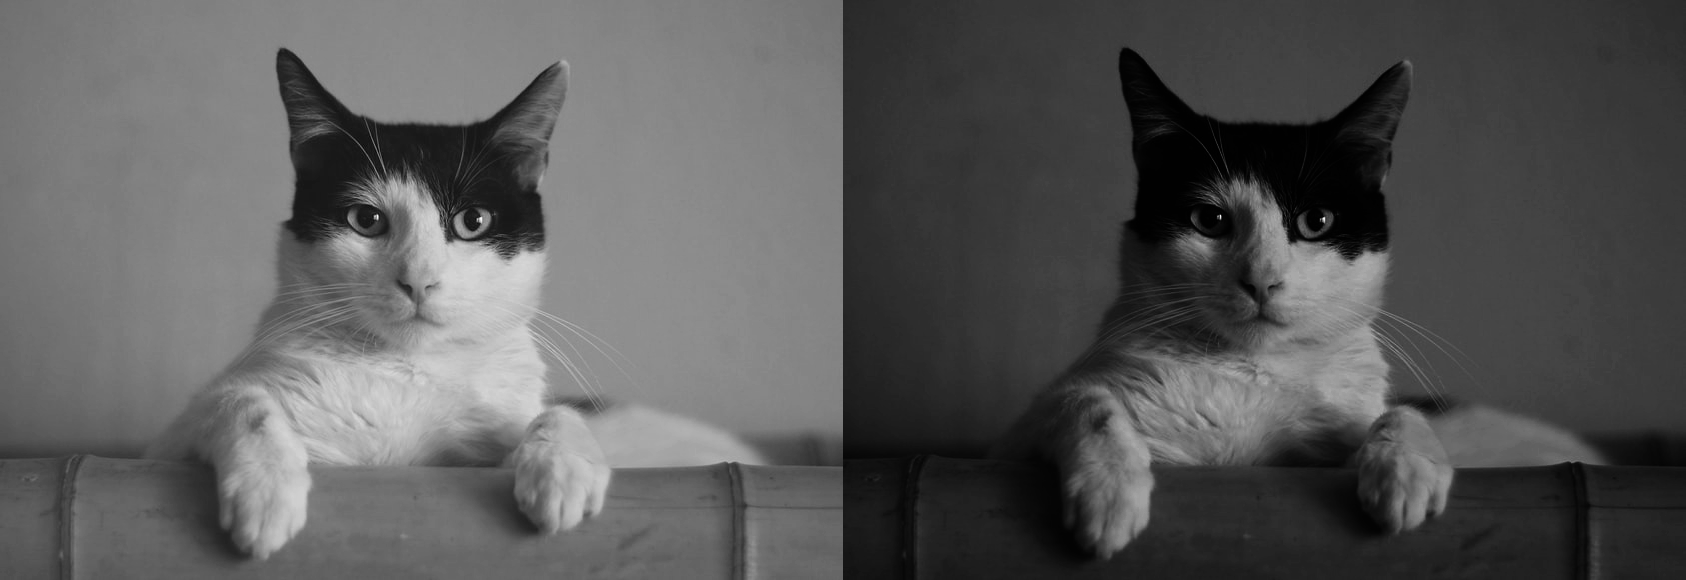

In [42]:
# gamma compression

gamma_arr_img = np.array(y)

im_22 = 255.0 * (gamma_arr_img  / 255.0)**2.2

concat = np.array(np.concatenate((y,im_22), axis=1), dtype=np.uint8)

pil_img = Image.fromarray(np.uint8(concat))

pil_img